## Nonlinear Constraints

IPOPT also supports nonlinear constraints. This notebook shows examples of design optimizations with nonlinear constraints.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import opti
from doe.design import find_local_max_ipopt

def plot_results_3d(result, surface_func):
    u, v = np.mgrid[0 : 2 * np.pi : 100j, 0 : np.pi : 80j]
    X = np.cos(u) * np.sin(v)
    Y = np.sin(u) * np.sin(v)
    Z = surface_func(X, Y)

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(X, Y, Z, alpha=0.3)
    ax.scatter(
        xs=result["x1"],
        ys=result["x2"],
        zs=result["x3"],
        marker="o",
        s=40,
        color="red",
    )
    ax.set(xlabel="x1", ylabel="x2", zlabel="x3")
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

### Example 1: Design inside a cone / nonlinear inequality

In the following example we have three design variables. 
We impose the constraint of all experiments to be contained in the interior of a cone, which corresponds the nonlinear inequality constraint
$\sqrt{x_1^2 + x_2^2} - x_3 \leq 0$.
The optimization is done for a linear model and places the points on the surface of the cone so as to maximize the between them

In [74]:
problem = opti.Problem(
    inputs=opti.Parameters(
        [
            opti.Continuous("x1", [-1, 1]),
            opti.Continuous("x2", [-1, 1]),
            opti.Continuous("x3", [0, 1]),
        ]
    ),
    outputs=[opti.Continuous("y")],
    constraints=[opti.NonlinearInequality("(x1**2 + x2**2)**0.5 - x3", names=["x1","x2","x3"], jacobian=["x1/(x1**2 + x2**2)**0.5,x2/(x1**2 + x2**2)**0.5,-1"]),
                 opti.NonlinearInequality("-x3", names=["x1","x2","x3"], jacobian=["0,0,-1"])
                 ],
)

result = find_local_max_ipopt(problem, "linear", ipopt_options={"disp":5, "maxiter": 100})
result.round(3)

/home/aaron/Documents/doe/doe/design.py:145: UserWarning: Sampling of points fulfilling this problem's constraints is not implemented.
  warnings.warn(


This is Ipopt version 3.14.10, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:      294
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:       21
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       21
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:       14
        inequality constraints with only lower bounds:       14
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.5359316e+00 0.00e+00 1.57e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00 

,x1,x2,x3
exp0,-0.953,-0.301,1.0
exp1,0.000,-0.000,-0.0
exp2,-0.008,-1.000,1.0
exp3,0.000,-0.000,-0.0
exp4,0.594,0.804,1.0
exp5,0.949,-0.317,1.0
exp6,-0.581,0.814,1.0


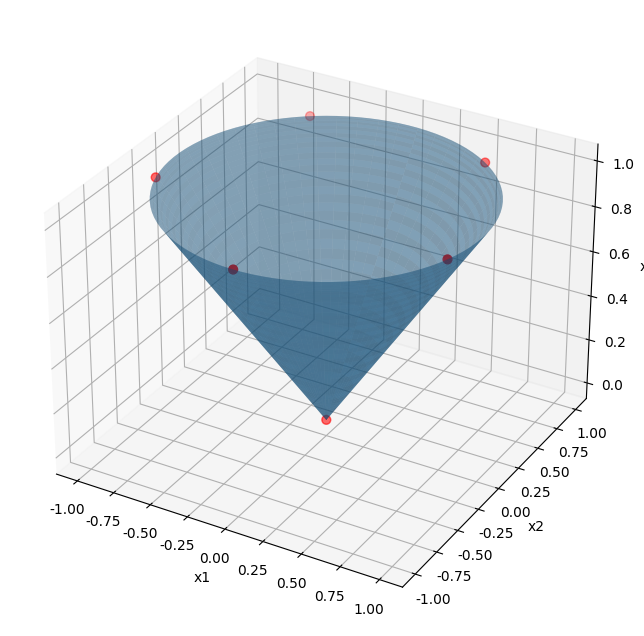

In [75]:
plot_results_3d(result, surface_func=lambda x1, x2: np.sqrt(x1**2 + x2**2))

And the same for a design space limited by an elliptical cone $x_1^2 + x_2^2 - x_3 \leq 0$.

In [3]:
problem = opti.Problem(
    inputs=opti.Parameters(
        [
            opti.Continuous("x1", [-1, 1]),
            opti.Continuous("x2", [-1, 1]),
            opti.Continuous("x3", [0, 1]),
        ]
    ),
    outputs=[opti.Continuous("y")],
    constraints=[opti.NonlinearInequality("x1**2 + x2**2 - x3")],
)

result = find_local_max_ipopt(problem, "linear", tol=0, ipopt_options={"maxiter": 100})
result.round(3)

c:\users\walzds\code\bayesopt\doe\doe\design.py:150: UserWarning: Sampling of points fulfilling this problem's constraints is not implemented.
  warnings.warn(


,x1,x2,x3
exp0,-0.216,-0.976,1.0
exp1,0.749,0.663,1.0
exp2,-0.000,-0.000,-0.0
exp3,-0.995,-0.096,1.0
exp4,-0.399,0.917,1.0
exp5,-0.000,-0.000,-0.0
exp6,0.862,-0.507,1.0


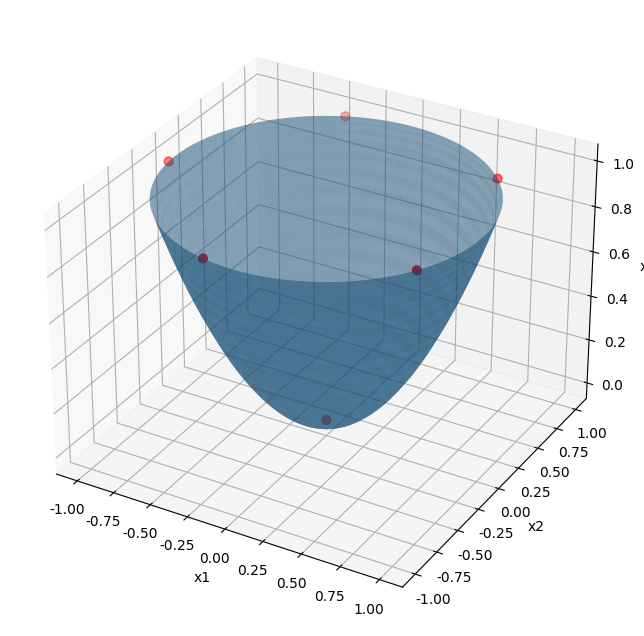

In [4]:
plot_results_3d(result, surface_func=lambda x1, x2: x1**2 + x2**2)

### Example 2: Design on the surface of a cone / nonlinear equality

We can also limit the design space to the surface of a cone, defined by the equality constraint $\sqrt{x_1^2 + x_2^2} - x_3 = 0$

Note that due to missing sampling methods in opti, the initial points provided to IPOPT don't satisfy the constraints.

In [5]:
problem = opti.Problem(
    inputs=opti.Parameters(
        [
            opti.Continuous("x1", [-1, 1]),
            opti.Continuous("x2", [-1, 1]),
            opti.Continuous("x3", [0, 1]),
        ]
    ),
    outputs=[opti.Continuous("y")],
    constraints=[opti.NonlinearEquality("(x1**2 + x2**2)**0.5 - x3")],
)

result = find_local_max_ipopt(problem, "linear", ipopt_options={"maxiter": 100})
result.round(3)

c:\users\walzds\code\bayesopt\doe\doe\design.py:112: UserWarning: Nonlinear constraints were detected. Not all features and checks are supported for this type of constraints.                 Using them can lead to unexpected behaviour.
  warnings.warn(
c:\users\walzds\code\bayesopt\doe\doe\design.py:150: UserWarning: Sampling of points fulfilling this problem's constraints is not implemented.
  warnings.warn(
c:\users\walzds\code\bayesopt\doe\doe\design.py:171: UserWarning: Sampling failed. Falling back to uniform sampling on input domain.                          Providing a custom sampling strategy compatible with the problem can                           possibly improve performance.
  warnings.warn(


,x1,x2,x3
exp0,-0.000,0.000,-0.0
exp1,0.669,0.743,1.0
exp2,0.914,-0.407,1.0
exp3,0.000,-0.000,-0.0
exp4,-0.500,0.866,1.0
exp5,-0.978,-0.208,1.0
exp6,-0.104,-0.995,1.0


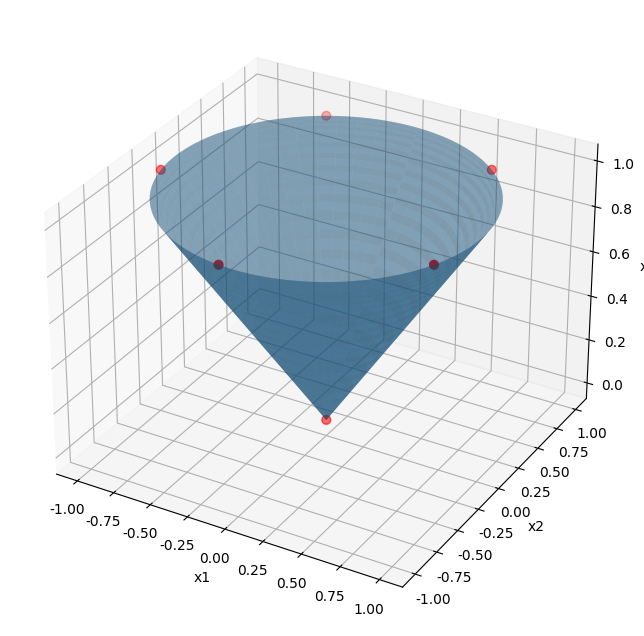

In [6]:
plot_results_3d(result, surface_func=lambda x1, x2: np.sqrt(x1**2 + x2**2))